# Consistency Results - HCE (Hierarchical Consistency Error)

In [23]:
# define the directory where the data is
data_path = "/home/jcapela/ec_numbers_prediction/required_data_ec_number_paper"

In [24]:
import pandas as pd

test = pd.read_csv(f"{data_path}/data/test.csv", nrows=2)

## Load all predictions pickle file

In [25]:
labels = test.columns[8:].values

In [26]:
# read predictions from pickle file
import pickle

with open(f"{data_path}/predictions/predictions_esm2_3b.pkl", "rb") as f:
    predictions_esm2_3b = pickle.load(f)

In [27]:
# read predictions from pickle file
import pickle

with open(f"{data_path}/predictions/predictions_esm1b.pkl", "rb") as f:
    predictions_esm1b = pickle.load(f)

In [28]:
# read predictions from pickle file
import pickle

with open(f"{data_path}/predictions/predictions_DeepEC.pkl", "rb") as f:
    predictions_deep_ec = pickle.load(f)

In [29]:
# read predictions from pickle file
import pickle

with open(f"{data_path}/predictions/predictions_DSPACE.pkl", "rb") as f:
    predictions_dspace = pickle.load(f)

In [30]:
# read predictions from pickle file
import pickle

with open(f"{data_path}/predictions/predictions_prot_bert.pkl", "rb") as f:
    predictions_prot_bert = pickle.load(f)

## Define the functions to calculate the consistency

In [31]:
import re


def is_hierarchical_consistent_with_multiple_types(prediction):
    """
    Check if the prediction is hierarchically consistent, allowing for multiple hierarchies.
    Each label should be a valid extension of any of the preceding labels.
    """
    if len(prediction) > 0:
        for i in range(0, len(prediction)):
            # Check if the current label starts with any of the preceding labels
            if not re.match(r"^\d+$", prediction[i]):
                is_consistent = any(prediction[i].startswith(pred) for pred in prediction[:i])
                if not is_consistent:
                    return False
        return True
    else:
        return True

## Calculate the consistency results

In [32]:
import numpy as np

def get_consistency_results(predictions):

    list_of_labels = []
    for i in range(predictions.shape[0]):
        predictions_ = np.where(predictions[i] == 1)[0]
        predictions_ = labels[predictions_]
        list_of_labels.append(list(predictions_))
    consistency_results_updated = [is_hierarchical_consistent_with_multiple_types(prediction) for prediction in list_of_labels]
    # count true values
    import collections

    counter = collections.Counter(consistency_results_updated)
    return counter[False] / (counter[False] + counter[True])

In [33]:
get_consistency_results(predictions_esm2_3b)

0.008125347378450627

In [34]:
get_consistency_results(predictions_esm1b)

0.006590265463303602

In [35]:
get_consistency_results(predictions_prot_bert)

0.01415980732075272

In [36]:
get_consistency_results(predictions_deep_ec)

0.07809067570071196

In [37]:
get_consistency_results(predictions_dspace)

0.04124870973718339

In [38]:
predictions_all = ("DNN ESM2 3B", predictions_esm2_3b), ("DNN ESM1b", predictions_esm1b), ("DNN ProtBERT", predictions_prot_bert), ("DeepEC CNN3", predictions_deep_ec), ("D-SPACE EC", predictions_dspace)

In [39]:
color_map = {'DNN ESM2 35M': (0.00392156862745098,
  0.45098039215686275,
  0.6980392156862745),
 'DNN ESM2 150M': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 'DNN ESM2 8M': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 'DNN ProtBERT': (0.8352941176470589, 0.3686274509803922, 0.0),
 'DNN ESM2 3B': (0.8, 0.47058823529411764, 0.7372549019607844),
 'DNN ESM2 650M': (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 'DNN ESM1b': (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 'DeepEC CNN3': (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 'D-SPACE EC': (0.9254901960784314, 0.8823529411764706, 0.2),
 'Models + BLASTp ensemble': (0.00392156862745098,
  0.45098039215686275,
  0.6980392156862745),
 'Models ensemble': (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
    'BLASTp': (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),}

consitency_results_all = [get_consistency_results(predictions)*100 for _, predictions in predictions_all]
names_results_all = [name for name, _ in predictions_all]
colors = [color_map[name] for name in names_results_all]

<Figure size 1170x827 with 0 Axes>

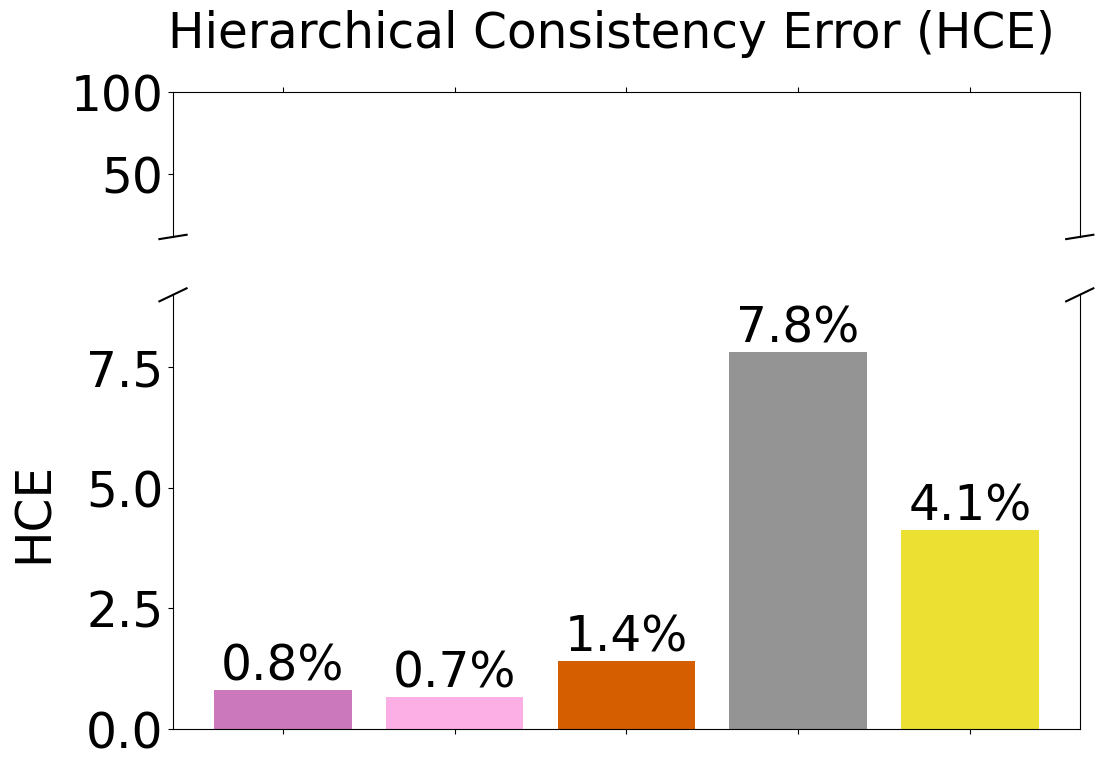

In [48]:


import matplotlib.pyplot as plt
import numpy as np
import matplotlib


matplotlib.rcParams['savefig.transparent'] = True

# Create figure and subplots
plt.figure(figsize=(11.7, 8.27))
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(11.7, 8.27), gridspec_kw={'height_ratios': [1, 3]})

# Plot the same data on both axes
ax.bar(names_results_all, consitency_results_all, color=colors)

plt.suptitle('Hierarchical Consistency Error (HCE)', fontsize=35)

ax2.bar(names_results_all, consitency_results_all, color=colors)

# Zoom-in / limit the view to different portions of the data
ax.set_ylim(12, 100)  # upper part
ax2.set_ylim(0, 9)    # lower part


# Hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax.yaxis.set_tick_params(labelsize=35)
#ax2.xaxis.tick_bottom()
ax2.tick_params(labelbottom=False)
#ax2.xaxis.set_tick_params(labelsize=35, rotation=90)
ax2.yaxis.set_tick_params(labelsize=35)

# Add diagonal lines to indicate the break in the y-axis
d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# Adding the error percentage values on top of each bar in the lower plot
for i, percentage in enumerate(consitency_results_all):
    ax2.text(i, percentage, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=35)

#plt.xlabel('Model', labelpad=20, fontsize=35)
plt.ylabel('HCE', labelpad=20, fontsize=35)
plt.savefig('consistency_results.png', dpi=400, bbox_inches='tight')